# IT - 542 Assignment - 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## (1) Draw 1000 samples from p(x) = P1.p1(x) + P2.p2(x) where, P1 = 0.6, P2 = 0.4, p1(x) ~ N(5,10) and p2(x) ~ N(10,15). Draw a histogram for the data.

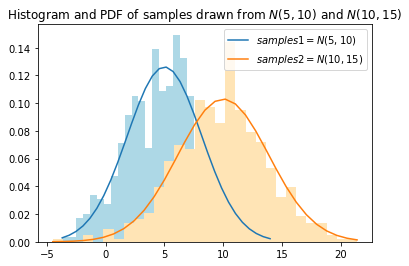

In [2]:
# Draw 500 samples each from N(5,10) and N(10,15) for visualization purpose
n_5_10_samples = np.random.normal(5, np.sqrt(10), 500)
n_10_15_samples = np.random.normal(10, np.sqrt(15), 500)

# Plot histogram and pdf of both sample sets
bins = 30

hist1, bins1, _ = plt.hist(n_5_10_samples, bins, density=True, color='lightblue')
bin_centers1 = 0.5*(bins1[1:] + bins1[:-1])  # Convert bin edges to centers

pdf1 = stats.norm.pdf(bins1, 5, np.sqrt(10))
plt.plot(bins1, pdf1, label='$samples1 = N(5,10)$')

hist2, bins2, _ = plt.hist(n_10_15_samples, bins, density=True, color='moccasin')
bin_centers2 = 0.5*(bins2[1:] + bins2[:-1])  # Convert bin edges to centers

pdf2 = stats.norm.pdf(bins2, 10, np.sqrt(15))
plt.plot(bins2, pdf2, label='$samples2 = N(10,15)$')

plt.title("Histogram and PDF of samples drawn from $N(5,10)$ and $N(10,15)$")
plt.legend()
plt.show()

## (2) Use the KDE to estimate pdf of given samples using
### $KDE(\frac{1}{nh} \sum^{n}_{i=1}(\frac{x - x_i}{h}), K \sim Normal)$
h is bandwidth, n is number samples.
h can be taken as <br>
### $h = (\frac{4\hat{\sigma}^5}{3n})^{\frac{1}{5}} \approx 1.06\hat{\sigma}n^{-1^{}/5^{}}$

In [3]:
# Draw 1000 samples from p(x) = 0.6*p1(x) + 0.4*p2(x)
n_samples = 1000
samples = []
for _ in range(n_samples):
    if np.random.random() < 0.6: samples.append(np.random.normal(5, np.sqrt(10)))
    else: samples.append(np.random.normal(10, np.sqrt(15)))
samples = np.array(samples)

Text(0.5, 1.0, 'Estimated PDF using KDE with Gaussian Kernel for 1000 samples')

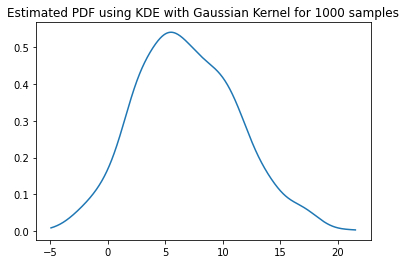

In [5]:
from math import sqrt, exp, pi

# Calculate stats of samples and get equidistant points
s_min, s_max = np.min(samples), np.max(samples)
s_mean, s_var = np.mean(samples), np.var(samples)
equidistant_points = np.linspace(s_min, s_max, num=n_samples)

# Calculate 'h' beforehand
h = 1.06 * sqrt(s_var) * (n_samples ** (-1/5))

# Run KDE algorithm
result_points = []
for x in equidistant_points:
    kde_sum_x = 0
    for x_i in samples:
        kde_sum_x += (1 / h*sqrt(2*pi)) * exp(-0.5 * ((x - x_i) / h)**2)
    kde_sum_x *= (1/n_samples)
    result_points.append(kde_sum_x)

# Plot estimated pdf
_, bins_s = np.histogram(samples, 1000, density=True)
bin_centers_s = 0.5*(bins_s[1:] + bins_s[:-1])
plt.plot(bin_centers_s, result_points)
plt.title(f"Estimated PDF using KDE with Gaussian Kernel for {n_samples} samples")